In [1]:
from packages.data_classes.data2D import Data2D
from packages.data_classes.mesh import Mesh
from packages.plot_classes.tangram import Tangram

In [2]:
import numpy

In [3]:
SD0203_mesh = Mesh('./Data/Geometry/SD/S20190203@25-6-66_24-6.v001.sno')
FS0308_mesh = Mesh('./Data/Geometry/FS/S20190308@25-10-50_25-6.v001.sno')
XD0130_mesh = Mesh('./Data/Geometry/XD/X20190130@31-12-68_26-6.v001.sno')

be careful! data2D reads in IyIx order but quadmesh has to drawn in IxIy order to take care of the cuts!

In [4]:
# electron temperature
SD_te = Data2D(SD0203_mesh, './Data/SDP6/2D_data/temperature/T_electron/te_2D')

FS_te = Data2D(FS0308_mesh, './Data/FSP6/2D_data/temperature/T_electron/te_2D')

XD_te = Data2D(XD0130_mesh, './Data/XDP6/2D_data/temperature/T_electron/te_2D')

some preparation calculation

In [5]:
# take out the outer divertor part

# te
SD_te_outerdiv = numpy.transpose(SD_te.IyIx[:, SD0203_mesh.ixcut[1]:])

FS_te_outerdiv = numpy.transpose(FS_te.IyIx[:, FS0308_mesh.ixcut[1]:])

XD_te_outerdiv = numpy.transpose(XD_te.IyIx[:, XD0130_mesh.ixcut[1]:])


compare electron temperature

In [6]:
print(SD_te_outerdiv.max())
print(FS_te_outerdiv.max())
print(XD_te_outerdiv.max())

print(SD_te_outerdiv.min())
print(FS_te_outerdiv.min())
print(XD_te_outerdiv.min())

82.7072900906364
84.7268058078148
116.011077789208
0.335745978424102
0.0001944094700940792
0.001523981159879599


# start attempting plots

## prepare the quad collection objects, without filling them with color yet

In [7]:
from matplotlib.collections import QuadMesh

be careful, here quadmesh is drawn using IxIy order!

In [8]:
quadmeshcoord_SD_outerdivertor = numpy.array(SD0203_mesh.GridPoint_IxIy[SD0203_mesh.ixcut[1]:])
stainedglass_SD_outerdivertor = QuadMesh(SD0203_mesh.ny + 1, SD0203_mesh.nx + 1 - SD0203_mesh.ixcut[1], quadmeshcoord_SD_outerdivertor)

quadmeshcoord_FS_outerdivertor = numpy.array(FS0308_mesh.GridPoint_IxIy[FS0308_mesh.ixcut[1]:])
stainedglass_FS_outerdivertor = QuadMesh(FS0308_mesh.ny + 1, FS0308_mesh.nx + 1 - FS0308_mesh.ixcut[1], quadmeshcoord_FS_outerdivertor)

quadmeshcoord_XD_outerdivertor = numpy.array(XD0130_mesh.GridPoint_IxIy[XD0130_mesh.ixcut[1]:])
stainedglass_XD_outerdivertor = QuadMesh(XD0130_mesh.ny + 1, XD0130_mesh.nx + 1 - XD0130_mesh.ixcut[1], quadmeshcoord_XD_outerdivertor)

In [9]:
stainedglass_SD_outerdivertor.set_linewidth(0.1)
stainedglass_SD_outerdivertor.set_edgecolor((0, 0, 0, 1))

stainedglass_FS_outerdivertor.set_linewidth(0.1)
stainedglass_FS_outerdivertor.set_edgecolor((0, 0, 0, 1))

stainedglass_XD_outerdivertor.set_linewidth(0.1)
stainedglass_XD_outerdivertor.set_edgecolor((0, 0, 0, 1))

## prepare figure and its axes

In [10]:
import matplotlib.pyplot as plt

fig_1, ax_1 = plt.subplots()

add a colorbar axes before instantiating a Tangram

In [11]:
ax_cb = fig_1.add_axes((0.9, 0.06, 0.3, 0.85))

In [12]:
colorcode = Tangram(ax_cb)

In [13]:
colorcode.read_colorbar("./21c-White2YellowMax.cb")

### putting the quad collections onto the axes and figure, without filling the colors yet

In [14]:
ax_1.add_collection(stainedglass_SD_outerdivertor)
ax_1.set_aspect('equal')
ax_1.set_xbound(1.19, 1.27)
ax_1.set_ybound(-1.364, -1.35)

In [15]:
ax_2 = fig_1.add_axes((0, 0.36, 1, 0.33))

In [16]:
ax_2.add_collection(stainedglass_FS_outerdivertor)
ax_2.set_aspect('equal')
ax_2.set_xbound(1.19, 1.27)
ax_2.set_ybound(-1.364, -1.35)

In [17]:
ax_3 = fig_1.add_axes((0, 0.06, 1, 0.33))

In [18]:
ax_3.add_collection(stainedglass_XD_outerdivertor)
ax_3.set_aspect('equal')
ax_3.set_xbound(1.15, 1.23)
ax_3.set_ybound(-1.364, -1.35)

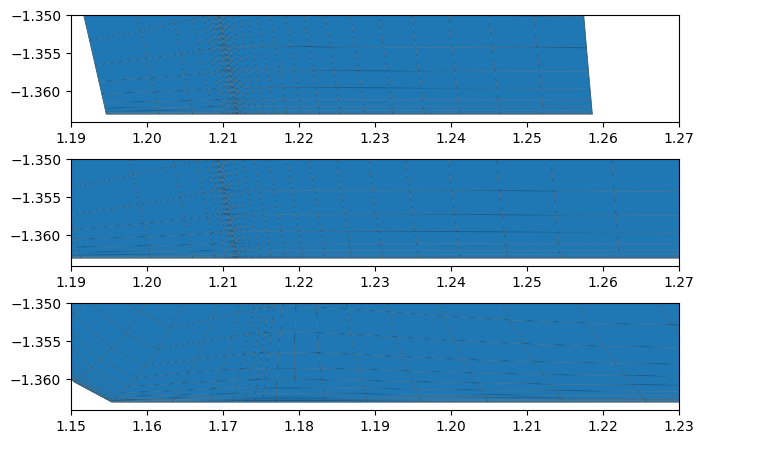

In [19]:
ax_1.set_position((0.16, 0.66, 0.95, 0.32))
ax_2.set_position((0.16, 0.36, 0.95, 0.32))
ax_3.set_position((0.16, 0.06, 0.95, 0.32))

fig_1

### draw the colorbar without the bins

In [20]:
from matplotlib.collections import PolyCollection

In [21]:
bin_height = 0.99 / len(colorcode.color)

barverts = tuple(((0.89, i*bin_height+0.005), (0.99, i*bin_height+0.005), (0.99, (i+1)*bin_height+0.005), (0.89, (i+1)*bin_height+0.005)) for i in range(len(colorcode.color)))

In [22]:
bar_vertical = PolyCollection(barverts)

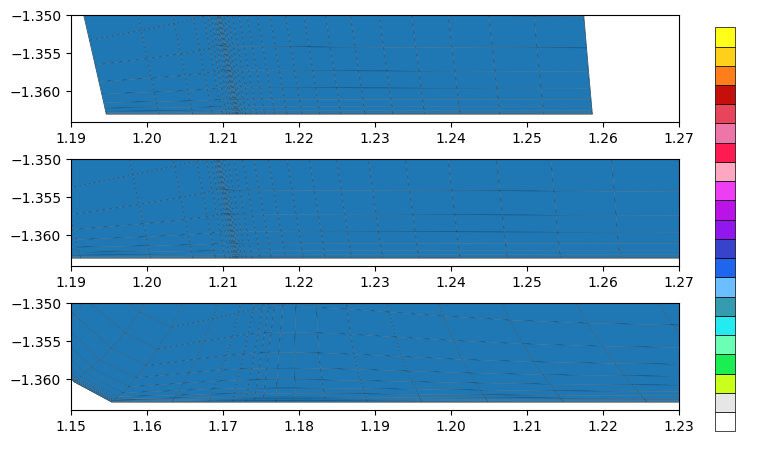

In [23]:
ax_cb.add_collection(bar_vertical)
bar_vertical.set_edgecolor('black')
bar_vertical.set_facecolor(colorcode.color)
bar_vertical.set_linewidth(0.5)
fig_1

## Now fill the quad collections with specific color to a data set

### set color code bin

for radiation density

In [32]:
colorcode.bin = [2.0, 4.0, 6.0, 8.0, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40]

In [33]:
# if you want tuple, remember to use "tuple()", otherwise () will not give you a tuple in this case

colors_SD_te_outerdiv = tuple(colorcode.map2color(x) for x in numpy.ravel(SD_te_outerdiv))

colors_FS_te_outerdiv = tuple(colorcode.map2color(x) for x in numpy.ravel(FS_te_outerdiv))

colors_XD_te_outerdiv = tuple(colorcode.map2color(x) for x in numpy.ravel(XD_te_outerdiv))

### fill the quad collection with color

In [34]:
stainedglass_SD_outerdivertor.set_facecolor(colors_SD_te_outerdiv)

stainedglass_FS_outerdivertor.set_facecolor(colors_FS_te_outerdiv)

stainedglass_XD_outerdivertor.set_facecolor(colors_XD_te_outerdiv)

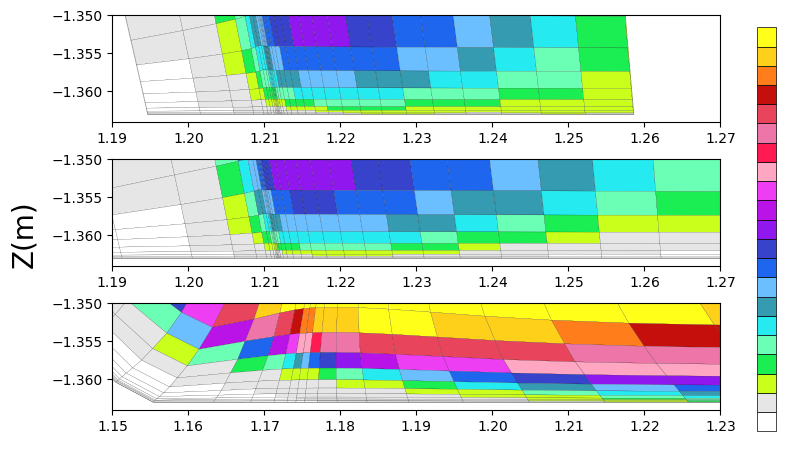

In [35]:
fig_1

add text to color bar

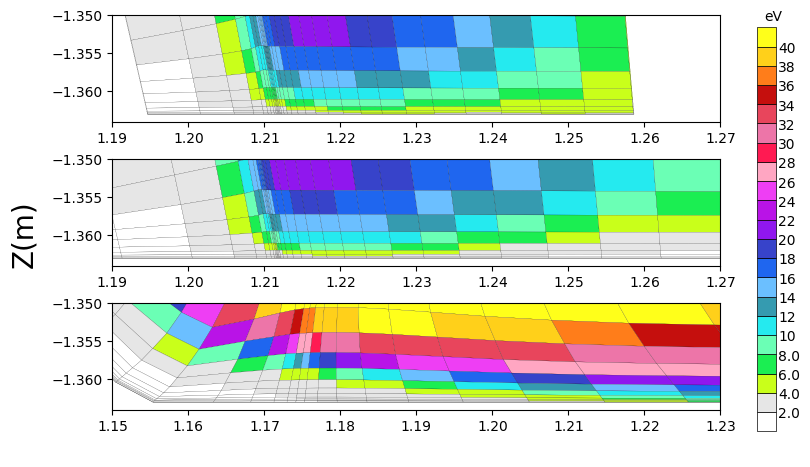

In [36]:
bin_text_fig_1 = [colorcode.axes.text(1.00, (i+1)*bin_height - 0.01, str(colorcode.bin[i])) for i in range(len(colorcode.bin))]
unit_fig_1 = colorcode.axes.text(0.93, 1.01, 'eV')
fig_1

add axis label to the figure

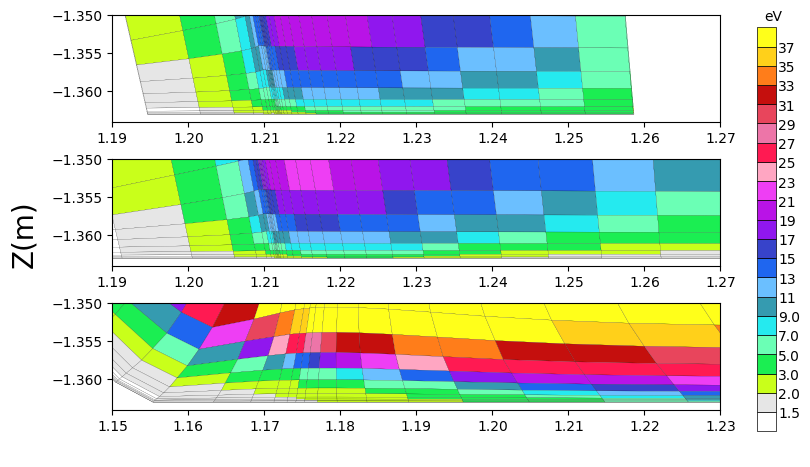

In [29]:
axis_label_y_fig_1 = fig_1.text(0.0, 0.5, 'Z(m)', rotation = 'vertical')
axis_label_y_fig_1.set_fontsize(20)
fig_1

In [37]:
fig_1.savefig('TeP6-zoom.svg', format='svg', bbox_inches='tight')

zoom out, show the whole divertor

first get the axes right

In [43]:
ax_1.set_xbound(1.08, 1.28)
ax_1.set_ybound(-1.37, -1.01)

In [60]:
ax_2.set_xbound(1.07, 1.34)
ax_2.set_ybound(-1.37, -1.01)

In [45]:
ax_3.set_xbound(1.10, 1.40)
ax_3.set_ybound(-1.37, -1.01)

hide the y-axis labels if using the same scale.

In [49]:
# these will trun off the ticks as well
# ax_2.get_yaxis().set_visible(False)
# ax_3.get_yaxis().set_visible(False)

ax_2.get_yaxis().set_visible(True)

# this will just hide the tick labels
ax_2.get_yaxis().set_ticklabels([])
ax_3.get_yaxis().set_ticklabels([])

[]

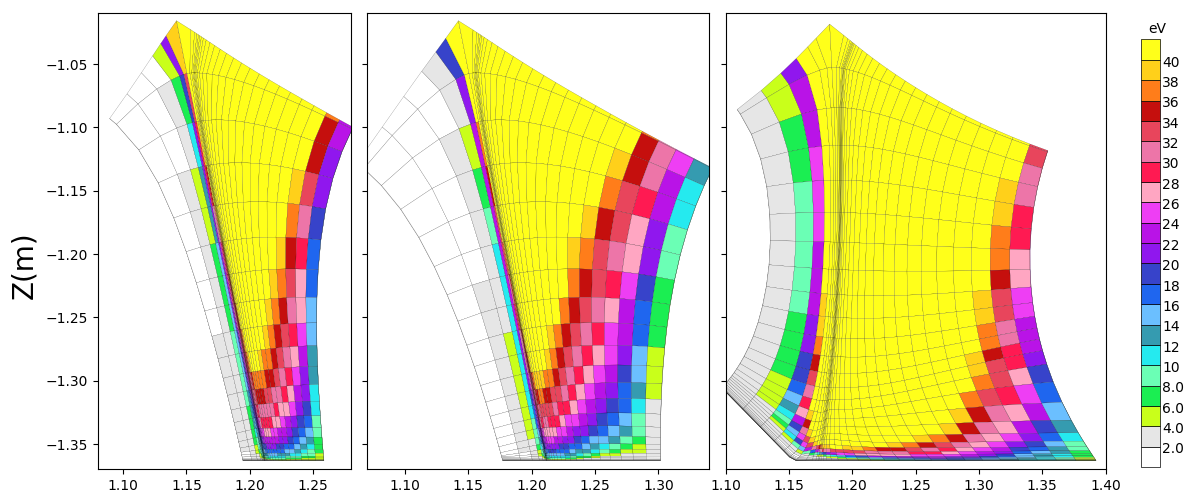

In [66]:
ax_1.set_position((0.11, 0.05, 0.45, 0.95))
ax_2.set_position((0.51, 0.05, 0.63, 0.95))
ax_3.set_position((1.09, 0.05, 0.65, 0.95))

fig_1

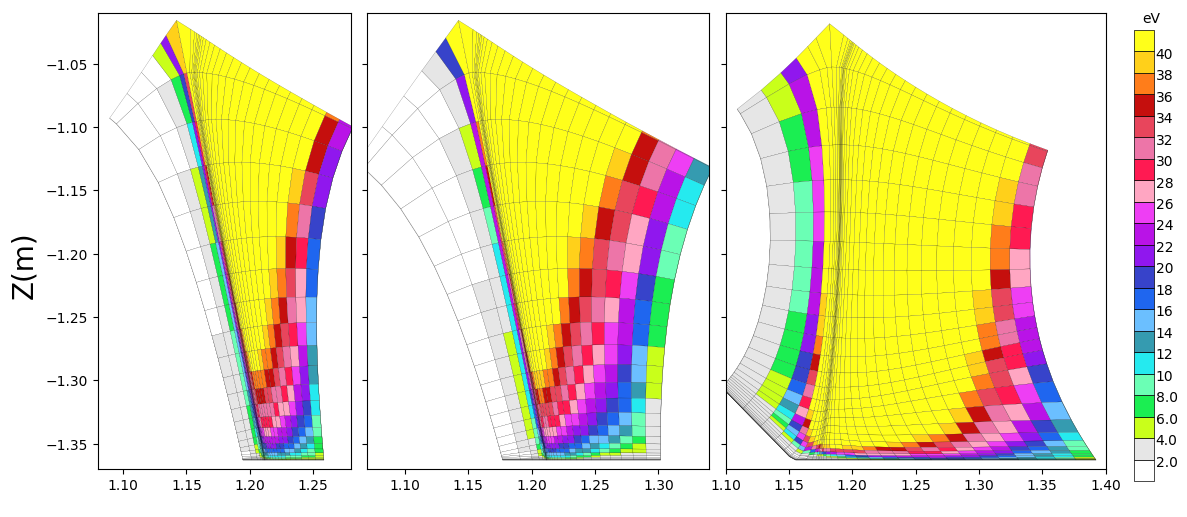

In [68]:
ax_cb.set_position((1.49, 0.02, 0.3, 0.95))
fig_1

In [77]:
colorcode.bin = [5.0, 10, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 110]

In [78]:
# if you want tuple, remember to use "tuple()", otherwise () will not give you a tuple in this case

colors_SD_te_outerdiv = tuple(colorcode.map2color(x) for x in numpy.ravel(SD_te_outerdiv))

colors_FS_te_outerdiv = tuple(colorcode.map2color(x) for x in numpy.ravel(FS_te_outerdiv))

colors_XD_te_outerdiv = tuple(colorcode.map2color(x) for x in numpy.ravel(XD_te_outerdiv))

In [79]:
stainedglass_SD_outerdivertor.set_facecolor(colors_SD_te_outerdiv)

stainedglass_FS_outerdivertor.set_facecolor(colors_FS_te_outerdiv)

stainedglass_XD_outerdivertor.set_facecolor(colors_XD_te_outerdiv)

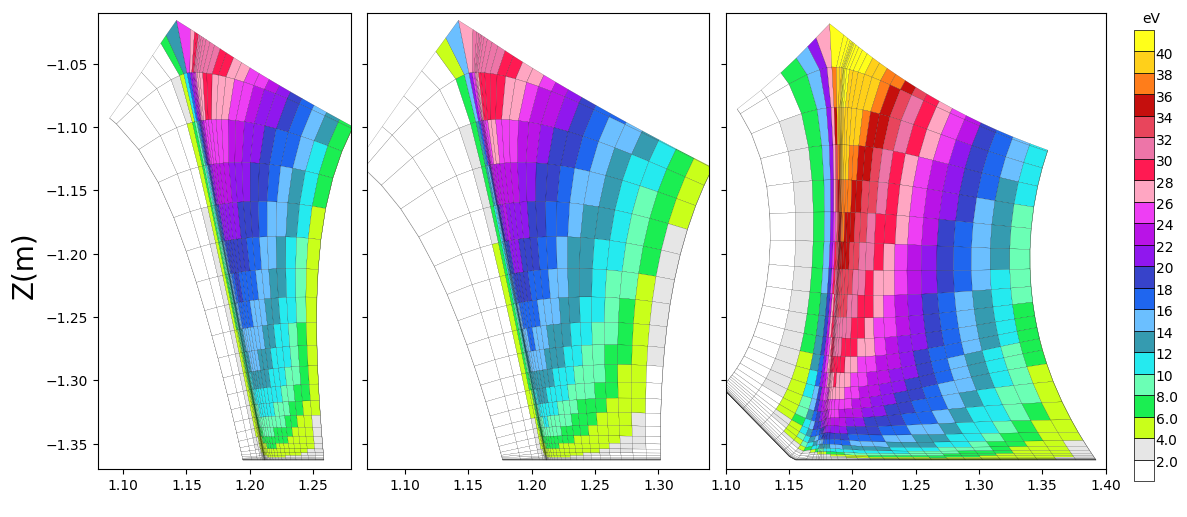

In [80]:
fig_1

In [81]:
for text in bin_text_fig_1:
    text.remove()
unit_fig_1.remove()

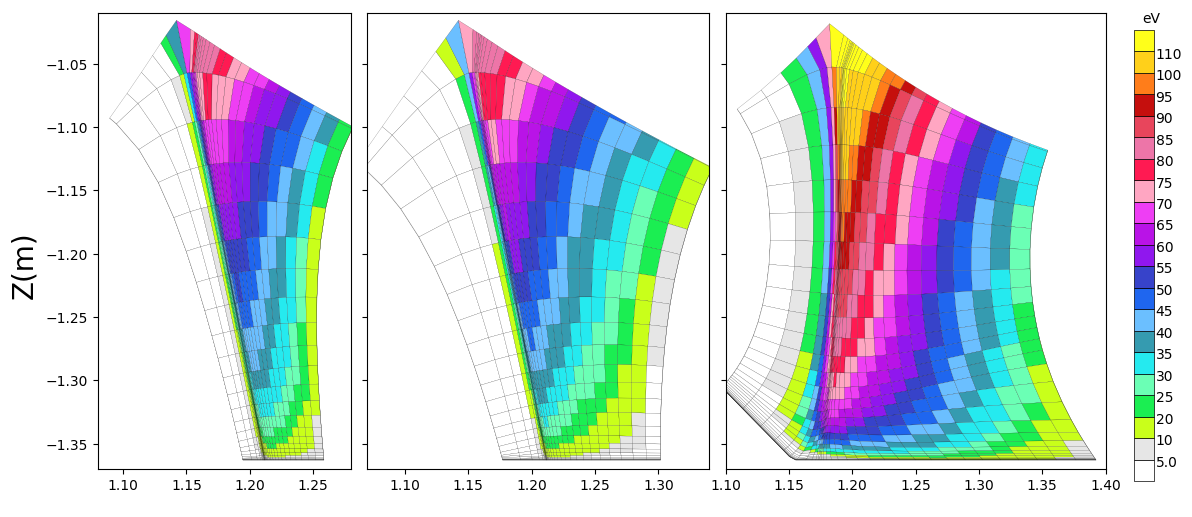

In [82]:
bin_text_fig_1 = [colorcode.axes.text(1.00, (i+1)*bin_height - 0.01, str(colorcode.bin[i])) for i in range(len(colorcode.bin))]
unit_fig_1 = colorcode.axes.text(0.93, 1.01, 'eV')
fig_1

In [83]:
fig_1.savefig('TeP6.svg', format='svg', bbox_inches='tight')